In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import ParameterGrid
import warnings
from sklearn.model_selection import train_test_split
from first_approach import preprocess_data
np.random.seed(42)
warnings.filterwarnings('ignore')


# Clustering Algorithms with Hyperparameter Research and 2D Visualization

In [12]:
data=pd.read_csv('data/data.csv')
train, test = train_test_split(
   data, test_size=0.3, random_state=42
) 


print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9864 entries, 0 to 9863
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9864 non-null   int64  
 1   Administrative_Duration  9864 non-null   float64
 2   Informational            9864 non-null   int64  
 3   Informational_Duration   9864 non-null   float64
 4   ProductRelated           9864 non-null   int64  
 5   ProductRelated_Duration  9864 non-null   float64
 6   BounceRates              9864 non-null   float64
 7   ExitRates                9864 non-null   float64
 8   PageValues               9864 non-null   float64
 9   SpecialDay               9864 non-null   float64
 10  Month                    9864 non-null   object 
 11  OperatingSystems         9864 non-null   int64  
 12  Browser                  9864 non-null   int64  
 13  Region                   9864 non-null   int64  
 14  TrafficTyp

## Data Preprocessing

In [13]:
train=preprocess_data(train)

def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    return pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(n_components)])

data_pca = apply_pca(train)

## Hyperparameter Research


In [5]:

def evaluate_clustering(data, labels):
    score = silhouette_score(data, labels)
    return score


def kmeans_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        kmeans = KMeans(**params, random_state=42)
        labels = kmeans.fit_predict(data)
        score = evaluate_clustering(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score


def hierarchical_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        agg_clustering = AgglomerativeClustering(**params)
        labels = agg_clustering.fit_predict(data)
        score = evaluate_clustering(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score


def gmm_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        gmm = GaussianMixture(**params, random_state=42)
        labels = gmm.fit_predict(data)
        score = evaluate_clustering(data, labels)
        if score > best_score:
            best_score = score
            best_params = params
    return best_params, best_score

def dbscan_hyperparameter_research(data, param_grid):
    best_score = -1
    best_params = None
    for params in ParameterGrid(param_grid):
        dbscan = DBSCAN(**params)
        labels = dbscan.fit_predict(data)
        # Silhouette score requires at least 2 clusters
        if len(set(labels)) > 1:
            score = evaluate_clustering(data, labels)
            if score > best_score:
                best_score = score
                best_params = params
    return best_params, best_score

In [6]:

kmeans_param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20],
    'max_iter': [300, 600]
}

hierarchical_param_grid = {
    'n_clusters': [2, 3, 4, 5],
    'linkage': ['ward', 'complete', 'average', 'single']
}

gmm_param_grid = {
    'n_components': [2, 3, 4, 5],
    'covariance_type': ['full', 'tied', 'diag', 'spherical']
}

dbscan_param_grid = {
    'eps': [0.3, 0.5, 0.7],
    'min_samples': [5, 10, 15]
}

In [14]:
print("\nK-Means Hyperparameter Research:")
best_kmeans_params, best_kmeans_score = kmeans_hyperparameter_research(data_pca, kmeans_param_grid)
print(f"Best K-Means Params: {best_kmeans_params}, Best Score: {best_kmeans_score:.2f}")


K-Means Hyperparameter Research:
Best K-Means Params: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 10}, Best Score: 0.37


In [15]:
print("\nHierarchical Clustering Hyperparameter Research:")
best_hierarchical_params, best_hierarchical_score = hierarchical_hyperparameter_research(data_pca, hierarchical_param_grid)
print(f"Best Hierarchical Params: {best_hierarchical_params}, Best Score: {best_hierarchical_score:.2f}")


Hierarchical Clustering Hyperparameter Research:
Best Hierarchical Params: {'linkage': 'single', 'n_clusters': 2}, Best Score: 0.55


In [16]:

print("\nGMM Hyperparameter Research:")
best_gmm_params, best_gmm_score = gmm_hyperparameter_research(data_pca, gmm_param_grid)
print(f"Best GMM Params: {best_gmm_params}, Best Score: {best_gmm_score:.2f}")



GMM Hyperparameter Research:
Best GMM Params: {'covariance_type': 'tied', 'n_components': 2}, Best Score: 0.44


In [17]:
print("\nDBSCAN Hyperparameter Research:")
best_dbscan_params, best_dbscan_score = dbscan_hyperparameter_research(data_pca, dbscan_param_grid)
print(f"Best DBSCAN Params: {best_dbscan_params}, Best Score: {best_dbscan_score:.2f}")


DBSCAN Hyperparameter Research:
Best DBSCAN Params: {'eps': 0.5, 'min_samples': 15}, Best Score: 0.54


## Clustering with Best Hyperparameters

In [24]:

def kmeans_clustering(data, params):
    kmeans = KMeans(**params, random_state=42)
    labels = kmeans.fit_predict(data)
    return labels

def hierarchical_clustering(data, params):
    agg_clustering = AgglomerativeClustering(**params)
    labels = agg_clustering.fit_predict(data)
    return labels

def gmm_clustering(data, params):
    gmm = GaussianMixture(**params, random_state=42)
    labels = gmm.fit_predict(data)
    return labels

def dbscan_clustering(data, params):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(data)
    return labels

kmeans_labels = kmeans_clustering(data_pca, best_kmeans_params)
hierarchical_labels = hierarchical_clustering(data_pca, best_hierarchical_params)
gmm_labels = gmm_clustering(data_pca, best_gmm_params)
dbscan_labels = dbscan_clustering(data_pca, best_dbscan_params)


## 2D Visualization


Plotting Clusters:


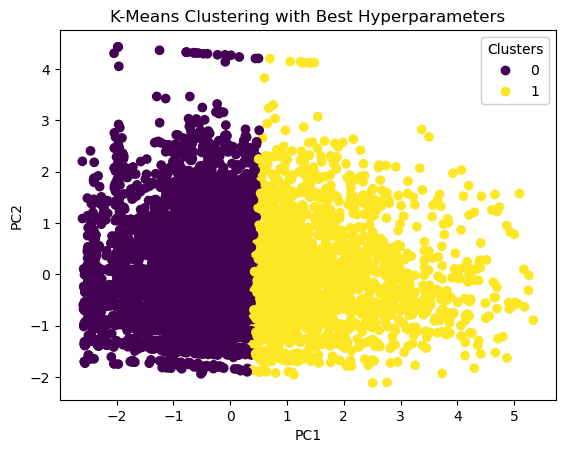

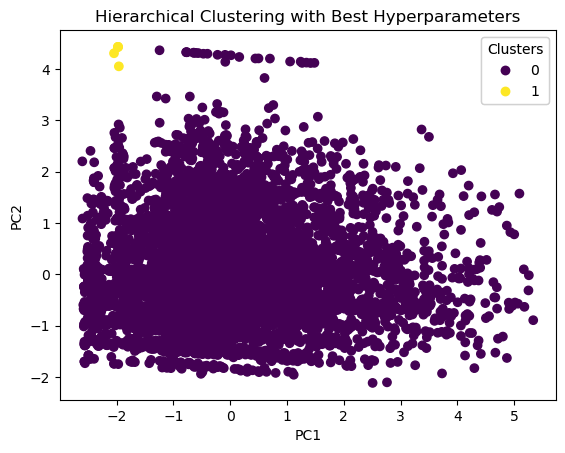

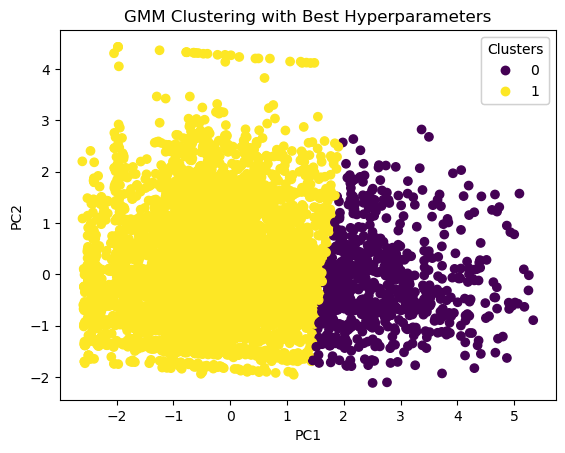

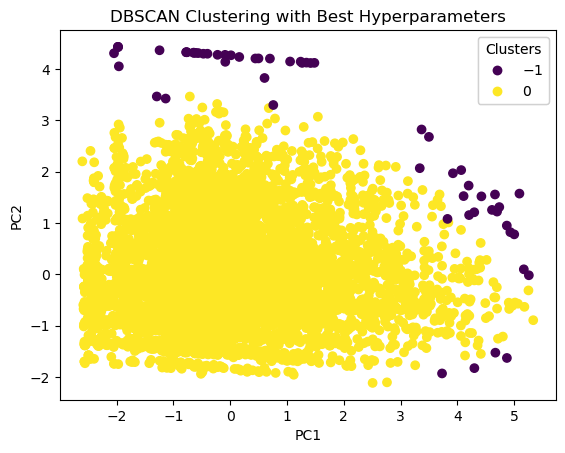

In [25]:

def plot_clusters_2d(data, labels, title):
    fig = plt.figure()
    ax = fig.add_subplot()
    scatter = ax.scatter(data['PC1'], data['PC2'], c=labels, cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    ax.add_artist(legend1)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(title)
    plt.show()

print("\nPlotting Clusters:")
plot_clusters_2d(data_pca, kmeans_labels, "K-Means Clustering with Best Hyperparameters")
plot_clusters_2d(data_pca, hierarchical_labels, "Hierarchical Clustering with Best Hyperparameters")
plot_clusters_2d(data_pca, gmm_labels, "GMM Clustering with Best Hyperparameters")
plot_clusters_2d(data_pca, dbscan_labels, "DBSCAN Clustering with Best Hyperparameters")